# **Initialisation du datasets**


---

## **Importation des bibliothèques**

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack

ModuleNotFoundError: No module named 'missingno'

---

## **Initialisation des données**

In [59]:
file_path = "https://raw.githubusercontent.com/Lu6asM/film-recommender/refs/heads/main/data/processed/df_movie_cleaned.csv"
df_movie = pd.read_csv(file_path)

### Inspecter les données initiales

In [60]:
df_movie.head()

,ID imdb,ID tmdb,Titre Original,Titre Français,Réalisateur(s),Acteurs,Budget,Genres,Mots-Clés,Genre Principal,...,Image de Fond,Durée,Métrage,Note tmdb,Votes tmdb,Note imdb,Votes imdb,Compagnies de Production,Pays de Production,Box Office
0,tt0035423,11232,Kate & Leopold,Kate et Léopold,James Mangold,"Breckin Meyer, Hugh Jackman, Paxton Whitehead...",48000000,"Romance, Fantasy, Comedy","new york city, time travel, duke, fish out of ...",Romance,...,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,118,Moyen,6.328,1232,6.4,90792,"Konrad Pictures, Miramax",United States of America,76019048
1,tt0066921,185,A Clockwork Orange,Orange mécanique,Stanley Kubrick,"Warren Clarke, Paul Farrell, Michael Gover, M...",2200000,"Science Fiction, Drama","london, england, robbery, street gang, great b...",Science Fiction,...,/yIonSXf1jdNihhK8PssxO6KCIfz.jpg,137,Moyen,8.200,11946,8.2,899189,"Warner Bros. Pictures, Hawk Films","United Kingdom, United States of America",26589000
2,tt0067093,14811,Fiddler on the Roof,Un violon sur le toit,Norman Jewison,"Topol, Rosalind Harris, Leonard Frey, Norma Cr...",9000000,"Drama, Romance","dream, parent child relationship, tradition, m...",Drama,...,/rqnOgJWvlURkcOWfGqiACvkTAqG.jpg,179,Moyen,7.686,501,8.0,48886,"United Artists, Cartier Productions, The Miris...",United States of America,83304330
3,tt0067328,25188,The Last Picture Show,La dernière séance,Peter Bogdanovich,"Ellen Burstyn, Eileen Brennan, Sam Bottoms, C...",1300000,Drama,"small town, new love, based on novel or book, ...",Drama,...,/fvmbYtOzQJqj0Y60UwyIB9iAaMD.jpg,119,Moyen,7.629,596,8.0,53932,"BBS Productions, Columbia Pictures, Last Pictu...",United States of America,29133000
4,tt0068646,238,The Godfather,Le Parrain,Francis Ford Coppola,"Robert Duvall, Al Lettieri, Diane Keaton, Ric...",6000000,"Drama, Crime","based on novel or book, loss of loved one, lov...",Drama,...,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,175,Moyen,8.707,18677,9.2,2076685,"Paramount, Alfran Productions",United States of America,245066411


In [61]:
df_movie.describe().T

,count,mean,std,min,25%,50%,75%,max
ID tmdb,4469.0,2.011784e+05,2.433612e+05,11.000,10559.000,6.872600e+04,3.636760e+05,1.160164e+06
Budget,4469.0,3.714346e+07,4.935577e+07,0.000,3300000.000,2.000000e+07,5.000000e+07,4.600000e+08
Popularité,4469.0,3.216279e+01,9.179103e+01,5.062,13.951,1.899800e+01,2.983300e+01,2.994357e+03
Durée,4469.0,1.090311e+02,1.971958e+01,0.000,96.000,1.060000e+02,1.190000e+02,2.470000e+02
Note tmdb,4469.0,6.530959e+00,9.518855e-01,0.000,6.057,6.557000e+00,7.100000e+00,9.000000e+00
Votes tmdb,4469.0,2.860023e+03,3.836464e+03,0.000,675.000,1.407000e+03,3.313000e+03,3.449500e+04
Note imdb,4469.0,6.513314e+00,9.078216e-01,1.700,6.000,6.500000e+00,7.100000e+00,9.300000e+00
Votes imdb,4469.0,1.611071e+05,2.440489e+05,8011.000,36435.000,7.483800e+04,1.759940e+05,2.976586e+06
Box Office,4469.0,1.085113e+08,2.063588e+08,0.000,2665322.000,3.352684e+07,1.170002e+08,2.923706e+09


<Axes: >

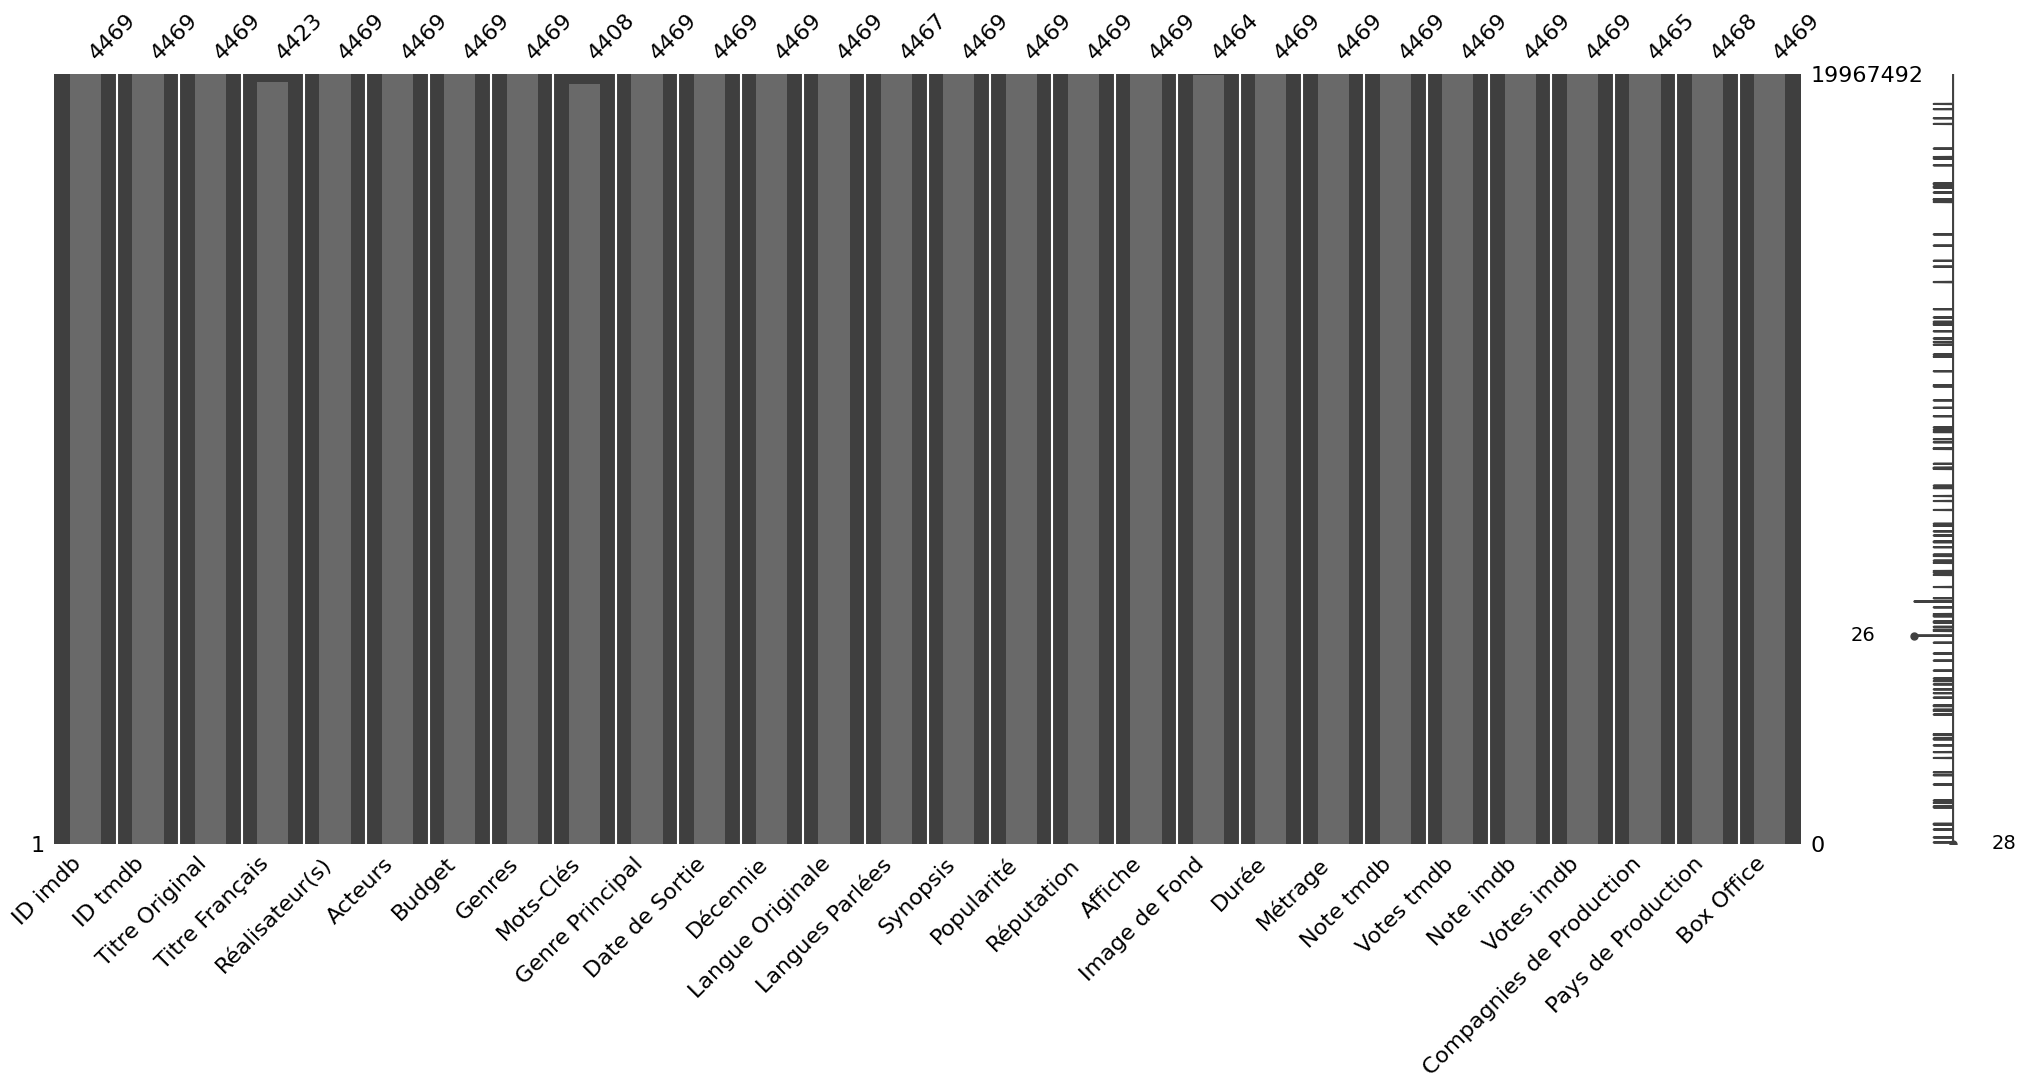

In [66]:
msno.matrix(df_movie)
msno.bar(df_movie)

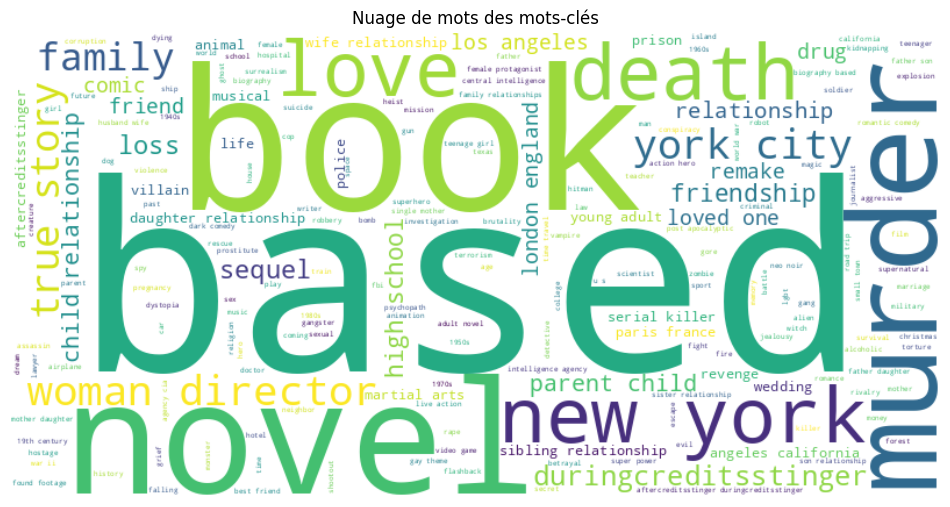

In [63]:
from wordcloud import WordCloud

# String of all words
all_words = ' '.join(df_movie['Mots-Clés'].dropna())

# Create and plot word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_words)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des mots-clés')
plt.show()

In [1]:
# Filtrer pour trouver un film spécifique
movie = df_movie[df_movie['Titre Français'].str.contains('Léon', case=False, na=False)]
movie

NameError: name 'df_movie' is not defined

### Nettoyage des données

In [65]:
# Permet d'enlever les doublons d'acteurs (jouant plusieurs roles dans le même film)
df_movie['Acteurs'] = df_movie['Acteurs'].fillna('').str.split(',').apply(set)
df_movie['Acteurs'] = df_movie['Acteurs'].apply(lambda x: ','.join(set(x)))

# Corrige la colonne des mots clés
df_movie['Mots-Clés'] = df_movie['Mots-Clés'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df_movie['Mots-Clés'] = df_movie['Mots-Clés'].str.replace(r"['\[\]]", '', regex=True)

### Creation d'une colonne pour description pour Tfidf Vectorizer

---

# **Système de recommandation**

# Système de Recommandation V1 de Films Basé sur la Similarité Textuelle

Ce notebook implémente un système de recommandation de films en utilisant des techniques de traitement du langage naturel (NLP). Le système calcule la similarité entre les films en s'appuyant sur leurs genres, mots-clés et synopsis.

---

## Objectif
Recommander des films similaires à partir d'un film donné en analysant leurs caractéristiques textuelles (genres, mots-clés, synopsis) et en utilisant une mesure de similarité cosinus.

---

## Étapes Principales

### 1. Chargement des Données
Les données des films sont chargées depuis un fichier CSV. Les colonnes importantes comprennent :
- **`Genres`** : Genres associés au film.
- **`Mots-Clés`** : Liste des mots-clés décrivant le film.
- **`Titre Original`** : Titre du film.
- **`Synopsis`** : Description textuelle du film.
- **`Date de Sortie`** : Date de lancement du film.
- **`Affiche`** : URL de l'affiche du film.

Les colonnes sont transformées pour faciliter le traitement :
- Les genres sont convertis en listes.
- Les mots-clés sont évalués comme des structures Python.

### 2. Préparation des Données
Une nouvelle colonne, `combined_features`, est créée pour fusionner les informations textuelles (genres, mots-clés, synopsis) de chaque film en une seule chaîne de caractères.

### 3. Calcul de la Similarité
Le système utilise les étapes suivantes pour effectuer une recommandation :
- **Vectorisation TF-IDF** : Les données textuelles combinées sont transformées en une matrice de caractéristiques pondérées.
- **Similarité Cosinus** : La similarité entre le film de référence et tous les autres films est calculée.
- Les films sont triés en fonction de leur score de similarité, en excluant le film de référence.

### 4. Recommandation
Une liste de films similaires est générée, incluant :
- Le titre du film.
- La date de sortie.
- Les genres associés.
- Le score de similarité avec le film de référence.

---

## Exemple d'Utilisation

Dans cet exemple, nous recommandons des films similaires à **"Kingdom of Heaven"** en sélectionnant les 5 films les plus proches :

```python
# Exemple d'utilisation
film_reference = "Kingdom of Heaven"
recommandations = recommander_films(film_reference, movies_df, k=10)
print(f"Recommandations pour '{film_reference}':")
max = 5
recommandations.iloc[0:max]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def charger_donnees_films(chemin_fichier):
    """Charge les données de films."""
    df = pd.read_csv(chemin_fichier, sep=',')
    df['genres'] = df['Genres'].str.split(', ')
    df['keywords'] = df['Mots-Clés'].apply(eval)
    df['title'] = df['Titre Original']
    df['overview'] = df['Synopsis']
    df['release_date'] = df['Date de Sortie']
    df['poster_path'] = df['Affiche']
    return df

def recommander_films(movie_title, movies_df, k=5):
    """Recommande des films similaires à partir du titre d'un film."""
    # Vérifier si le film existe
    if movie_title not in movies_df['title'].values:
        raise ValueError(f"Le film '{movie_title}' n'a pas été trouvé dans la base de données.")

    # Extraire le film de référence
    ref_movie = movies_df[movies_df['title'] == movie_title].iloc[0]

    # Caractéristiques pour le calcul de similarité
    features = ['genres', 'keywords', 'overview']

    def process_data(data):
        if isinstance(data, list):
            return ' '.join(data)
        return str(data)

    # Fusionner les caractéristiques textuelles
    movies_df['combined_features'] = movies_df[features].apply(
        lambda x: ' '.join([process_data(x[feature]) for feature in features]), axis=1)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(stop_words='english')
    feature_matrix = vectorizer.fit_transform(movies_df['combined_features'])
    ref_vector = vectorizer.transform([movies_df['combined_features'][ref_movie.name]])

    # Calcul de similarité cosinus
    similarity_scores = cosine_similarity(ref_vector, feature_matrix)[0]

    # Trier les films par similarité (exclure le film de référence)
    movies_df['similarity_score'] = similarity_scores
    recommended_movies = movies_df[movies_df.index != ref_movie.name]\
    .nlargest(k, 'similarity_score')\
    .sort_values('similarity_score', ascending=True)

    return recommended_movies[['title', 'release_date', 'genres', 'similarity_score']]

# Chargement des données
movies_df = charger_donnees_films('https://raw.githubusercontent.com/Lu6asM/film-recommender/refs/heads/main/data/processed/df_movie_cleaned.csv')

In [ ]:
# Exemple d'utilisation
film_reference = "Kingdom of Heaven"
recommandations = recommander_films(film_reference, movies_df, k=10)
print(f"Recommandations pour '{film_reference}':")
max = 5
recommandations.iloc[0:max]

# Recommandation de Films V2 Basée sur la Similarité avec K-Nearest Neighbors (KNN)

Ce notebook présente une approche alternative pour recommander des films en utilisant un modèle basé sur les **plus proches voisins** (KNN). La recommandation est effectuée en combinant plusieurs caractéristiques textuelles des films et en calculant leur similarité à l'aide de la vectorisation TF-IDF et de la distance cosinus.

---

## Objectif
Recommander des films en fonction de leur similitude globale avec un film donné, en prenant en compte des éléments tels que les genres, mots-clés, synopsis, réalisateurs et acteurs.

---

## Étapes Principales

### 1. Prétraitement des Données
Les données sont nettoyées et normalisées pour garantir la cohérence du texte :
- Les colonnes textuelles (`Genres`, `Mots-Clés`, `Réalisateur(s)`, `Synopsis`, `Acteurs`) sont converties en minuscules et les espaces superflus sont supprimés.
- Une colonne supplémentaire, **`description`**, est créée pour combiner les caractéristiques textuelles importantes en une seule chaîne de caractères. Cette colonne servira de base pour l'analyse de similarité.

### 2. Calcul de la Similarité
Le système utilise les étapes suivantes pour effectuer une recommandation :
- **Vectorisation TF-IDF** : Les données textuelles combinées sont transformées en une matrice de caractéristiques pondérées.
- **Similarité Cosinus** : La similarité entre le film de référence et tous les autres films est calculée.
- Les films sont triés en fonction de leur score de similarité, en excluant le film de référence.

### 3. Recommandation
Une liste de films similaires est générée, incluant :
- Le titre du film.
- La date de sortie.
- Les genres associés.
- Le score de similarité avec le film de référence.

Exemple de transformation :
```python
# Exemple d'utilisation
recommended_films = recommander_films_v2("Transformers: Rise of the Beasts", k=12)
recommended_films[['Réalisateur(s)', 'Titre Original', 'Genre Principal', 'Genres', 'Mots-Clés', 'Durée', 'Votes imdb', 'Note imdb', 'Votes tmdb', 'Note tmdb', 'Acteurs', 'Distance']]



In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Copie du DataFrame pour les opérations de nettoyage
df_ml = df_movie.copy()

# Normalisation des colonnes textuelles
df_ml['Genres'] = df_ml['Genres'].str.strip().str.lower()
df_ml['Mots-Clés'] = df_ml['Mots-Clés'].str.strip().str.lower()
df_ml['Réalisateur(s)'] = df_ml['Réalisateur(s)'].str.strip().str.lower()
df_ml['Synopsis'] = df_ml['Synopsis'].str.strip().str.lower()
df_ml['Acteurs'] = df_ml['Acteurs'].str.strip().str.lower()

# Création de la colonne 'description' en combinant les informations
df_ml['description'] = (
    df_ml['Genres'].fillna('').astype(str) + ' | ' +
    df_ml['Mots-Clés'].fillna('').astype(str) + ' | ' +
    df_ml['Réalisateur(s)'].fillna('').astype(str) + ' | ' +
    df_ml['Synopsis'].fillna('').astype(str) + ' | ' +
    df_ml['Acteurs'].fillna('').astype(str)
)

def recommander_films_v2(movie_title, k=5):
    """
    Recommande des films en fonction de leur similarité avec un film donné.

    Args:
    - movie_title (str): Le titre original du film de référence.
    - k (int): Nombre de recommandations à retourner.

    Returns:
    - DataFrame contenant les films recommandés.
    """
    # Vérifie si le film donné existe dans le dataset
    if movie_title not in df_ml['Titre Original'].values:
        raise ValueError(f"Le film '{movie_title}' n'est pas dans la base de données.")

    # Trouve l'index du film correspondant au titre donné
    movie_index = df_ml[df_ml['Titre Original'] == movie_title].index[0]

    # Prétraitement avec TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')
    X_text = vectorizer.fit_transform(df_ml['description'])

    # Combinaison des matrices textuelles
    X_combined = X_text.tocsr()

    # Utilisation de NearestNeighbors
    knn = NearestNeighbors(n_neighbors=k+1, metric='cosine')
    knn.fit(X_combined)

    # Calcul des voisins
    distances, indices = knn.kneighbors(X_combined[movie_index], n_neighbors=k+1)
    similar_indices = indices.flatten()[1:]  # Exclure le film lui-même

    # Recommandations finales
    recommendations = df_movie.iloc[similar_indices].copy()
    recommendations['Distance'] = distances.flatten()[1:]  # Ajouter les distances


    # Trier par similarité (distance) pour un classement plus pertinent
    return recommendations.sort_values('Distance')


In [69]:
recommended_films = recommander_films_v2("Transformers: Rise of the Beasts", k=8)
recommended_films[['Réalisateur(s)', 'Titre Original', 'Genre Principal', 'Genres', 'Mots-Clés', 'Durée', 'Votes imdb', 'Note imdb', 'Votes tmdb', 'Note tmdb', 'Acteurs', 'Distance']]

,Réalisateur(s),Titre Original,Genre Principal,Genres,Mots-Clés,Durée,Votes imdb,Note imdb,Votes tmdb,Note tmdb,Acteurs,Distance
3612,Michael Bay,Transformers: The Last Knight,Action,"Action, Adventure, Science Fiction","england, chosen one, based on toy, knight, pla...",154,173869,5.2,5727,6.059,"Isabela Merced, Santiago Cabrera, Laura Haddo...",0.792934
3193,Michael Bay,Transformers: Age of Extinction,Science Fiction,"Science Fiction, Action, Adventure","music video, sequel, alien, based on toy, gian...",165,336888,5.6,7581,5.920,"Bingbing Li, Nicola Peltz Beckham, T.J. Mille...",0.855241
2476,Michael Bay,Transformers: Dark of the Moon,Action,"Action, Science Fiction, Adventure","chicago, illinois, spacecraft, moon, traitor, ...",154,439245,6.2,7736,6.183,"Shia LaBeouf, Kevin Dunn, Josh Duhamel, Patric...",0.864361
3358,Joss Whedon,Avengers: Age of Ultron,Action,"Action, Adventure, Science Fiction","artificial intelligence (a.i.), saving the wor...",141,944118,7.3,21754,7.276,"Mark Ruffalo, James Spader,Robert Downey Jr.,...",0.870185
1922,Michael Bay,Transformers: Revenge of the Fallen,Science Fiction,"Science Fiction, Action, Adventure","egypt, chaos, sun, tank, symbol, alien, artifa...",149,436223,6.0,7939,6.200,"Shia LaBeouf, Kevin Dunn, Josh Duhamel, John B...",0.883121
4385,Josh Cooley,Transformers One,Animation,"Animation, Science Fiction, Adventure, Action,...","based on toy, giant robot, aftercreditsstinger...",0,37343,7.6,0,0.000,"Jon Hamm,Chris Hemsworth, Keegan-Michael Key,...",0.887403
3267,Jon Watts,Spider-Man: Homecoming,Action,"Action, Adventure, Science Fiction, Drama","high school, new york city, washington dc, usa...",133,741300,7.4,20507,7.345,"Tom Holland, Tom Holland, Donald Glover, Jon F...",0.901168
1756,Scott Derrickson,The Day the Earth Stood Still,Drama,"Drama, Science Fiction, Thriller","spacecraft, government, panic, extraterrestria...",104,181093,5.5,3133,5.598,"Jon Hamm, Robert Knepper, Jennifer Connelly, ...",0.902022


# 🎬 Système Avancé de Recommandation de Films

## 📌 Objectif du Projet

Développer un système de recommandation intelligent qui suggère des films basés sur des critères multiples, offrant une expérience de découverte cinématographique riche et personnalisée.

## 🔍 Méthodologie de Recommandation

### Caractéristiques d'Analyse

Notre système utilise une approche multi-critères pour évaluer la similarité entre films :

- **Genres** (Pondération : 40%)
- **Mots-Clés** (Pondération : 20%)
- **Réalisateurs** (Pondération : 15%)
- **Acteurs** (Pondération : 15%)
- **Synopsis** (Pondération : 10%)

### Techniques de Traitement

- **Vectorisation** : TF-IDF (Term Frequency-Inverse Document Frequency)
- **Similarité** : Cosinus
- **Pondération Dynamique** : Ajustement des poids selon les préférences

## 🛠 Architecture Technique

### Composants Principaux

1. **Préparation des Données**
   - Nettoyage et transformation des métadonnées
   - Génération d'URLs d'images
   - Normalisation des données textuelles

2. **Moteur de Recommandation**
   - Calcul de similarité multi-critères
   - Filtrage et classement des recommandations

3. **Interface Utilisateur**
   - Widgets interactifs
   - Affichage dynamique des résultats

## 📊 Bibliothèques Utilisées

- `pandas` : Manipulation de données
- `scikit-learn` :
  - Vectorisation TF-IDF
  - Calcul de similarité
- `numpy` : Calculs numériques
- `ipywidgets` : Interface interactive
- `IPython.display` : Rendu riche

## 💡 Exemple de Code

### Configuration des Poids

```python
default_weights = {
    'genres': 0.4,
    'keywords': 0.2,
    'directors': 0.15,
    'actors': 0.15,
    'description': 0.1
}

In [1]:
import pandas as pd
import numpy as np
import traceback
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from ipywidgets import interact, widgets, Output, VBox, HBox, Text
from IPython.display import display, HTML

def generate_tmdb_image_url(file_path, size='w500'):
    if not file_path or pd.isna(file_path):
        return "https://via.placeholder.com/500x750.png?text=No+Image"
    file_path = file_path.lstrip('/')
    base_url = "https://image.tmdb.org/t/p/"
    valid_sizes = ['w92', 'w154', 'w185', 'w342', 'w500', 'w780', 'original']
    size = size if size in valid_sizes else 'w500'
    return f"{base_url}{size}/{file_path}"

def charger_donnees_films(chemin_fichier):
    df = pd.read_csv(chemin_fichier, sep=',')
    df['genres'] = df['Genres'].str.split(', ')
    df['keywords'] = df['Mots-Clés'].apply(eval)
    df['title'] = df['Titre Original']
    df['overview'] = df['Synopsis']
    df['release_date'] = df['Date de Sortie']
    df['director'] = df['Réalisateur(s)']
    df['cast'] = df['Acteurs'].str.split(', ')
    df['poster_path'] = df['Affiche']
    return df

def recommander_films_v3(movie_title, movies_df, k=5):
    feature_mapping = {
        'genres': ['genres', 'Genres'],
        'keywords': ['keywords', 'Mots-Clés'],
        'directors': ['director', 'Réalisateur(s)'],
        'actors': ['cast', 'Acteurs'],
        'description': ['overview', 'Synopsis']
    }

    def find_column(feature_options):
        for col in feature_options:
            if col in movies_df.columns:
                return col
        return None

    mapped_columns = {
        key: find_column(cols)
        for key, cols in feature_mapping.items()
    }

    default_weights = {
        'genres': 0.4,
        'keywords': 0.2,
        'directors': 0.15,
        'actors': 0.15,
        'description': 0.1
    }

    if movie_title not in movies_df['title'].values:
        raise ValueError(f"Le film '{movie_title}' n'a pas été trouvé dans la base de données.")

    ref_movie = movies_df[movies_df['title'] == movie_title].iloc[0]

    vectorizers = {
        feature: TfidfVectorizer(token_pattern=r'\b\w+\b')
        for feature in mapped_columns.keys() if mapped_columns[feature]
    }

    feature_similarities = {}
    for feature, vectorizer in vectorizers.items():
        if not mapped_columns[feature]:
            continue

        def process_feature_data(data):
            if isinstance(data, list):
                return ' '.join(map(str, data))
            elif isinstance(data, str):
                return data
            return ''

        feature_data = movies_df[mapped_columns[feature]].apply(process_feature_data).fillna('')
        feature_matrix = vectorizer.fit_transform(feature_data)
        ref_feature_vector = vectorizer.transform([process_feature_data(ref_movie[mapped_columns[feature]])])

        similarity = cosine_similarity(ref_feature_vector, feature_matrix)[0]
        feature_similarities[feature] = similarity

    combined_similarity = np.zeros(len(movies_df))
    for feature, similarity in feature_similarities.items():
        combined_similarity += similarity * default_weights.get(feature, 0)

    def compute_additional_scores(ref_movie, movies_df):
        scores = np.zeros(len(movies_df))
        year_col = find_column(['release_year', 'release_date', 'Année'])
        if year_col:
            if 'release_date' in movies_df.columns:
                movies_df['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year
            year_diff = np.abs(movies_df['release_year'] - pd.to_datetime(ref_movie['release_date'], errors='coerce').year)
            year_score = 1 / (1 + year_diff)
        else:
            year_score = np.ones(len(movies_df))
        return year_score * 0.1

    additional_scores = compute_additional_scores(ref_movie, movies_df)
    combined_similarity += additional_scores

    movie_indices = combined_similarity.argsort()[::-1][1:k+1]
    recommended_films = movies_df.iloc[movie_indices].copy()
    recommended_films['similarity_distance'] = combined_similarity[movie_indices]

    output_columns = [
        'title', 'release_date', 'genres', 'overview',
        'similarity_distance', 'poster_path'
    ]

    return recommended_films[output_columns].sort_values('similarity_distance', ascending=True)

def afficher_recommandations(movies_df, movie_title, nb_recommandations):
    try:
        recommended_films = recommander_films_v3(movie_title, movies_df, k=nb_recommandations)
        for _, film in recommended_films.iterrows():
            display(HTML(f"""
            <div style="display: flex; margin-bottom: 20px;">
                <img src="{generate_tmdb_image_url(film['poster_path'], size='w342')}"
                     style="width: 150px; height: auto; margin-right: 20px;">
                <div>
                    <h3>{film['title']} ({film['release_date']})</h3>
                    <p><strong>Genres :</strong> {', '.join(film['genres'])}</p>
                    <p>{film['overview']}</p>
                    <p><strong>Score de similarité :</strong> {film['similarity_distance']:.2f}</p>
                </div>
            </div>
            """))
    except Exception as e:
        print("Erreur :", e)
        print(traceback.format_exc())

# Chargement des données
movies_df = charger_donnees_films('https://raw.githubusercontent.com/Lu6asM/film-recommender/refs/heads/main/data/processed/df_movie_cleaned.csv')

# Widgets interactifs
movie_title_input = Text(
    value='',
    description='Film:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

nb_recommandations_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description="Recommandations:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output = Output()

def on_change(change):
    with output:
        output.clear_output()
        movie_title = movie_title_input.value.strip()
        if movie_title:
            afficher_recommandations(movies_df, movie_title, nb_recommandations_slider.value)

movie_title_input.observe(on_change, names='value')
nb_recommandations_slider.observe(on_change, names='value')

display(VBox([movie_title_input, nb_recommandations_slider, output]))


ModuleNotFoundError: No module named 'ipywidgets'

In [28]:
def afficher_recommandations_withoutext(movies_df, movie_title, nb_recommandations):
    try:
        recommended_films = recommander_films_v3(movie_title, movies_df, k=nb_recommandations)
        for _, film in recommended_films.iterrows():
            display(HTML(f"""
            <div style="display: flex; margin-bottom: 20px;">
                <img src="{generate_tmdb_image_url(film['poster_path'], size='w342')}"
                     style="width: 150px; height: auto; margin-right: 20px;">
                <div>
                    <h3>{film['title']} ({film['release_date']})</h3>
                    <p><strong>Genres :</strong> {', '.join(film['genres'])}</p>
                    <p>{film['overview']}</p>
                    <p><strong>Score de similarité :</strong> {film['similarity_distance']:.2f}</p>
                </div>
            </div>
            """))
    except Exception as e:
        print("Erreur :", e)
        print(traceback.format_exc())

# Chargement des données
movies_df = charger_donnees_films('https://raw.githubusercontent.com/Lu6asM/film-recommender/refs/heads/main/data/processed/df_movie_cleaned.csv')

# Widgets interactifs
movie_title_selector = widgets.Dropdown(
    options=movies_df['title'].tolist(),
    description="Film:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

nb_recommandations_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description="Recommandations:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output = Output()

def on_change(change):
    with output:
        output.clear_output()
        afficher_recommandations_withoutext(movies_df, movie_title_selector.value, nb_recommandations_slider.value)

movie_title_selector.observe(on_change, names='value')
nb_recommandations_slider.observe(on_change, names='value')

display(VBox([movie_title_selector, nb_recommandations_slider, output]))